In [47]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
img_height = 224
img_width = 224

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 4752 files belonging to 11 classes.
Using 3802 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 4752 files belonging to 11 classes.
Using 950 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['aluminium_foil', 'brown_bread', 'corduroy', 'cork', 'cotton', 'cracker', 'lettuce_leaf', 'linen', 'white_bread', 'wood', 'wool']


TypeError: only integer scalar arrays can be converted to a scalar index

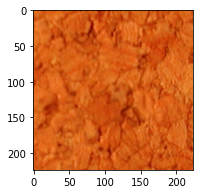

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
import effnetv2_model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[224, 224, 3]),
    effnetv2_model.get_model('efficientnetv2-b3', include_top=False),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(11, activation='softmax'),
])

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [8]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [9]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5


C:\Users\user\.conda\envs\effiv2\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


30/30 [==============================] - 29s 556ms/step - loss: 1.8838 - accuracy: 0.4540 - val_loss: 0.9653 - val_accuracy: 0.9137
Epoch 2/5
30/30 [==============================] - 13s 425ms/step - loss: 0.8683 - accuracy: 0.9095 - val_loss: 0.6931 - val_accuracy: 0.9495
Epoch 3/5
30/30 [==============================] - 13s 425ms/step - loss: 0.7092 - accuracy: 0.9637 - val_loss: 0.6152 - val_accuracy: 0.9811
Epoch 4/5
30/30 [==============================] - 13s 429ms/step - loss: 0.6597 - accuracy: 0.9782 - val_loss: 0.5956 - val_accuracy: 0.9884
Epoch 5/5
30/30 [==============================] - 13s 432ms/step - loss: 0.6360 - accuracy: 0.9834 - val_loss: 0.5807 - val_accuracy: 0.9926


In [15]:
import keras

img = keras.preprocessing.image.load_img(
    './test_samples/cork.png', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [16]:
prediction = model(img_array)
score = tf.nn.softmax(prediction[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cotton with a 10.83 percent confidence.


In [14]:
plt.imshow(img)

NameError: name 'plt' is not defined

In [32]:
sample = val_ds.take(1)

Predict: cracker         Real: cracker        
Predict: wool            Real: wool           
Predict: cracker         Real: cracker        
Predict: wood            Real: wood           
Predict: white_bread     Real: white_bread    
Predict: brown_bread     Real: brown_bread    
Predict: aluminium_foil  Real: aluminium_foil 
Predict: wool            Real: wool           


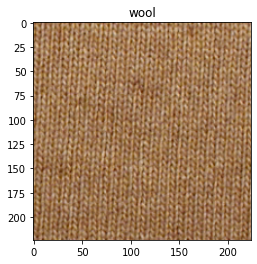

In [128]:
for sample_image, sample_label in val_ds.take(10):
    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(sample_label[0])])
    pedict = model(sample_image)
    print('Predict: {:<15} Real: {:<15}'.format(class_names[np.argmax(pedict[0])], class_names[np.argmax(sample_label[0])]))